
# **Simple multi-layer perceptron**


In [1]:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils.np_utils import to_categorical
from tensorflow.keras.optimizers import RMSprop
import numpy as np

ModuleNotFoundError: No module named 'tensorflow'

**Set vars, load MNIST (hand written digits) data**

In [ ]:
batch_size = 20000
num_classes = 10
epochs = 5

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
np.sum(y_train==8)

5851

**Visualize data**

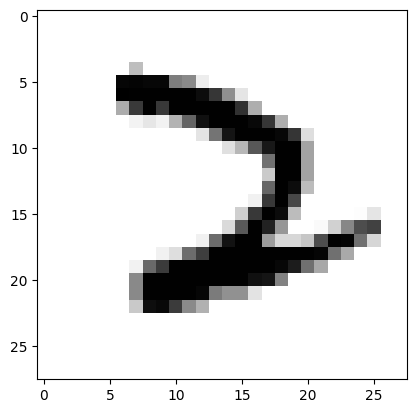

2


In [ ]:
import matplotlib.pyplot as plt

plt.imshow(x_train[3890],cmap=plt.cm.binary)
plt.show()
x_train[0].shape

print(y_train[3890])

In [ ]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

y_train[0:20]

60000 train samples
10000 test samples


array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

In [ ]:
y_train.shape

(60000,)

In [ ]:
# convert class vectors to binary class matrices
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

y_train.shape

(60000, 10)

In [ ]:
y_train[0:20,:]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

**Model description**

- Put the "lego blocks" together


In [ ]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
#model.add(Dropout(0.2))
#model.add(Dense(512, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


**Visualization of the model**

In [ ]:
from keras.utils.vis_utils import plot_model

#plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
plot_model(model, show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


**Compile the model**

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

**Fit the model**

In [ ]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=50,
                    verbose=1,
                    validation_data=(x_test, y_test))

Epoch 1/50
3/3 [==============================] - 1s 160ms/step - loss: 1.8394 - accuracy: 0.4392 - val_loss: 1.1835 - val_accuracy: 0.6733
Epoch 2/50
3/3 [==============================] - 0s 111ms/step - loss: 1.0803 - accuracy: 0.6954 - val_loss: 0.8325 - val_accuracy: 0.7601
Epoch 3/50
3/3 [==============================] - 0s 121ms/step - loss: 0.7722 - accuracy: 0.7961 - val_loss: 0.6315 - val_accuracy: 0.8566
Epoch 4/50
3/3 [==============================] - 0s 123ms/step - loss: 0.6296 - accuracy: 0.8442 - val_loss: 0.5795 - val_accuracy: 0.8418
Epoch 5/50
3/3 [==============================] - 0s 126ms/step - loss: 0.5886 - accuracy: 0.8389 - val_loss: 0.4998 - val_accuracy: 0.8756
Epoch 6/50
3/3 [==============================] - 0s 115ms/step - loss: 0.5024 - accuracy: 0.8722 - val_loss: 0.4487 - val_accuracy: 0.8889
Epoch 7/50
3/3 [==============================] - 0s 119ms/step - loss: 0.4582 - accuracy: 0.8812 - val_loss: 0.4298 - val_accuracy: 0.8888
Epoch 8/50
3/3 [====

**Evaluate the model**

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.17084167897701263
Test accuracy: 0.9517999887466431
